In [2]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer 
import matplotlib.pyplot as plt 
import seaborn as snp
import plotly.express as px

In [3]:
df = pd.read_csv('Loan Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Data Cleaning------->

In [7]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender'].isnull().sum()

0

In [8]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Married'].isnull().sum()

0

In [9]:
df['Dependents'] = df['Dependents'].fillna(0)

In [10]:
df['Dependents'].isnull().sum()

0

In [11]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Self_Employed'].isnull().sum()

0

In [12]:
df['LoanAmount'].mean()

146.41216216216216

In [13]:
df['LoanAmount'].median()

128.0

In [14]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [15]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [16]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
num_col = df.select_dtypes('number').columns.to_list()
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [20]:
l_num = df[num_col]

1 . What is the average income of the applicants?

In [21]:
df['ApplicantIncome'].mean()

5403.459283387622

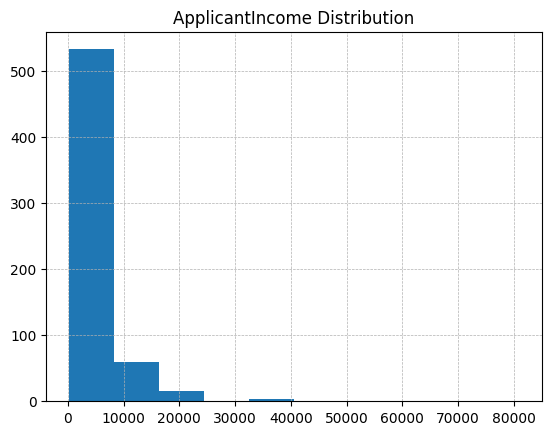

In [22]:
plt.hist(l_num['ApplicantIncome'])
plt.title('ApplicantIncome Distribution')
plt.grid(axis='both', linestyle='--', linewidth=0.5)  
plt.show()

===> Most applicants fall within the income range of 0 to ₹10,000.

2 . What is the total number of CoapplicantIncome of the document that were distributed?

In [23]:
df['CoapplicantIncome'].sum()

995444.9199886399

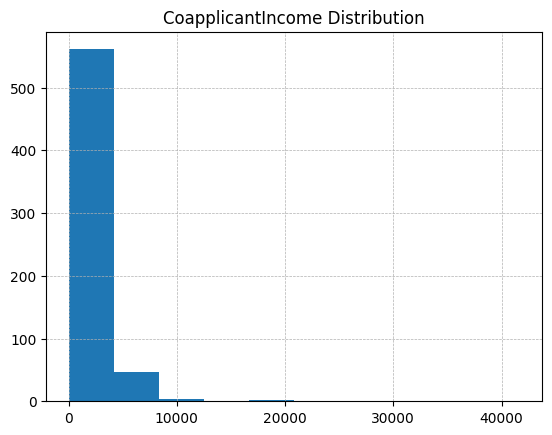

In [24]:
plt.hist(l_num['CoapplicantIncome'])
plt.title('CoapplicantIncome Distribution')
plt.grid(axis='both', linestyle='--', linewidth=0.5)  
plt.show()

======>The number of copies of the document distributed increases rapidly in the first few days after the document is released.

3 . Draw a histogram of how much Credit_History is?

In [25]:
l_num['Credit_History'].unique()

array([1., 0.])

In [26]:
l_num['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

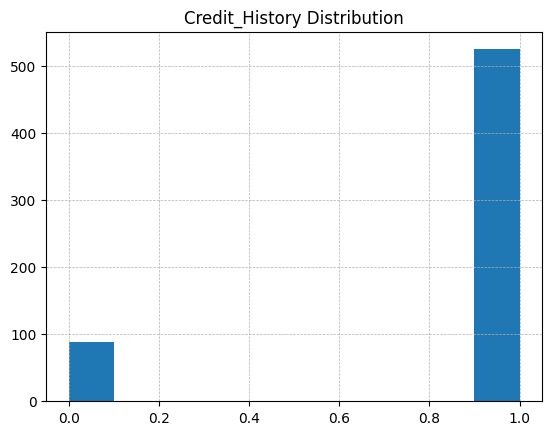

In [27]:
plt.hist(l_num['Credit_History'])
plt.title('Credit_History Distribution')
plt.grid(axis='both', linestyle='--', linewidth=0.5)  
plt.show()

4 . Draw a histogram of how much LoanAmount is?

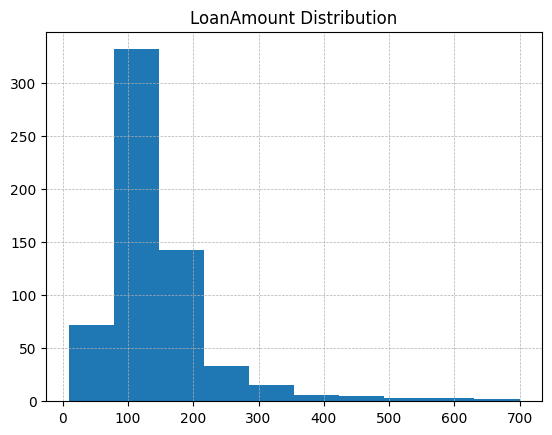

In [28]:
plt.hist(l_num['LoanAmount'])
plt.title('LoanAmount Distribution')
plt.grid(axis='both', linestyle='--', linewidth=0.5)  
plt.show()

5 . Draw a histogram of how much Loan_Amount_Term is?

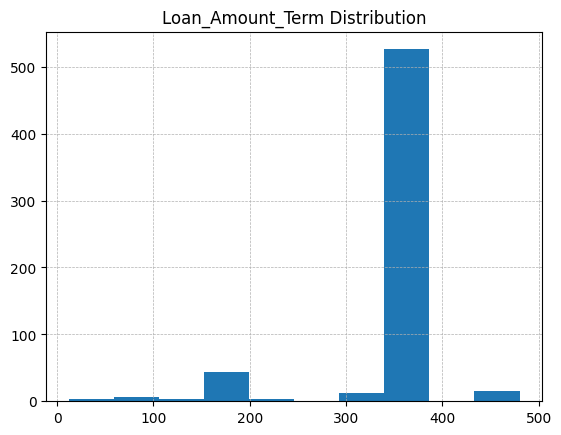

In [29]:
plt.hist(l_num['Loan_Amount_Term'])
plt.title('Loan_Amount_Term Distribution')
plt.grid(axis='both', linestyle='--', linewidth=0.5)  
plt.show()

In [30]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [31]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
0      15
Name: count, dtype: int64

In [32]:
cat_col = df.select_dtypes('object').columns.to_list()
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [33]:
l_cat = df[cat_col]

In [34]:
l_cat['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [35]:
loan_status_counts = l_cat['Loan_Status'].value_counts().reset_index(name='Count')

6 . Whose loanstats is higher among yes or no? Sum up and write.

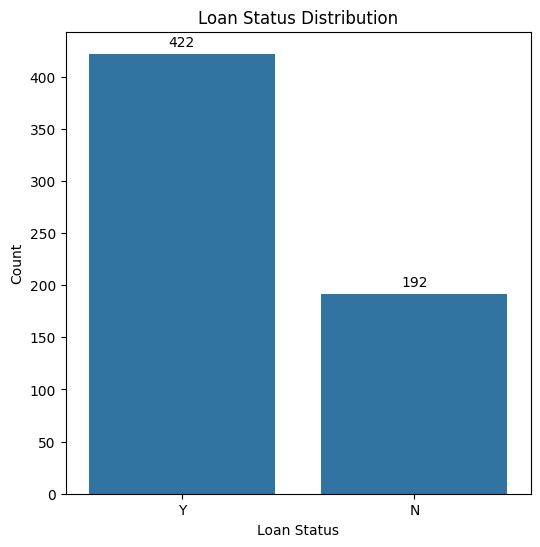

In [36]:
plt.figure(figsize=(6,6))
snp.barplot(x="Loan_Status", y="Count", data=loan_status_counts)
for index, row in loan_status_counts.iterrows():
    plt.annotate(row['Count'], (index, row['Count']), textcoords="offset points", xytext=(0,5), ha='center')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

7 . male and female mathi loan status konu vdhare chhe?

In [37]:
loan_status_by_gender = l_cat.groupby('Gender')['Loan_Status'].value_counts()
loan_status_by_gender

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: count, dtype: int64

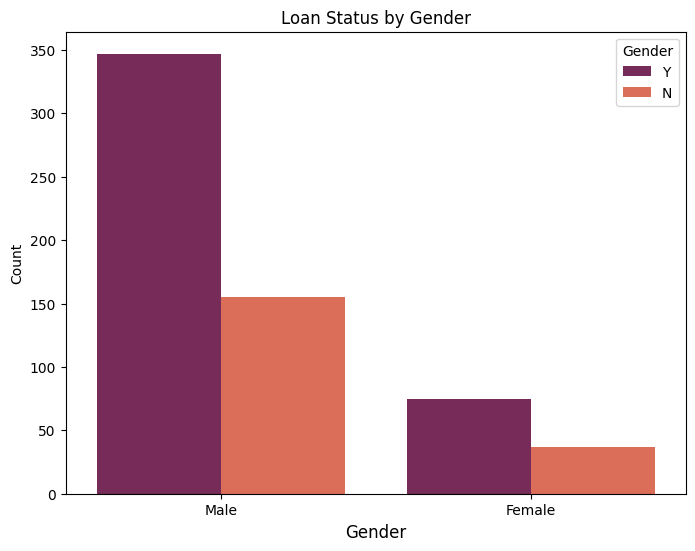

In [38]:
plt.figure(figsize=(8, 6))
snp.countplot(x=l_cat['Gender'], hue=l_cat['Loan_Status'], data=l_cat,palette='rocket')
plt.title('Loan Status by Gender')
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [39]:
loan_status_by_eduction = l_cat.groupby('Education')['Loan_Status'].value_counts()
loan_status_by_eduction

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: count, dtype: int64

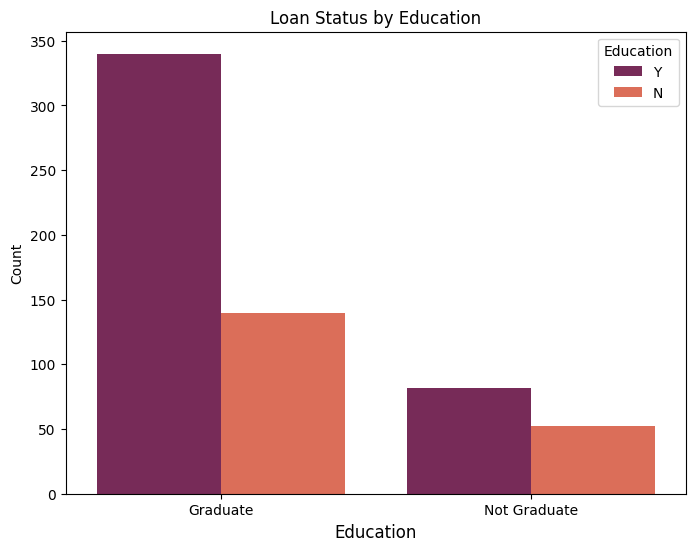

In [40]:
plt.figure(figsize=(8, 6))
snp.countplot(x=l_cat['Education'], hue=l_cat['Loan_Status'], data=l_cat,palette='rocket')
plt.title('Loan Status by Education')
plt.xlabel('Education',fontsize=12)
plt.ylabel('Count')
plt.legend(title='Education')
plt.show()

In [41]:
loan_status_by_married = l_cat.groupby('Married')['Loan_Status'].value_counts()
loan_status_by_married

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              288
         N              113
Name: count, dtype: int64

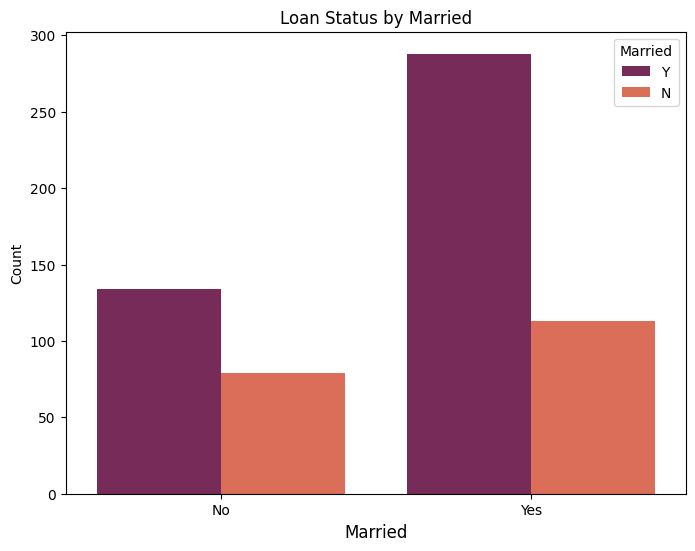

In [42]:
plt.figure(figsize=(8, 6))
snp.countplot(x=l_cat['Married'], hue=l_cat['Loan_Status'], data=l_cat,palette='rocket')
plt.title('Loan Status by Married')
plt.xlabel('Married',fontsize=12)
plt.ylabel('Count')
plt.legend(title='Married')
plt.show()

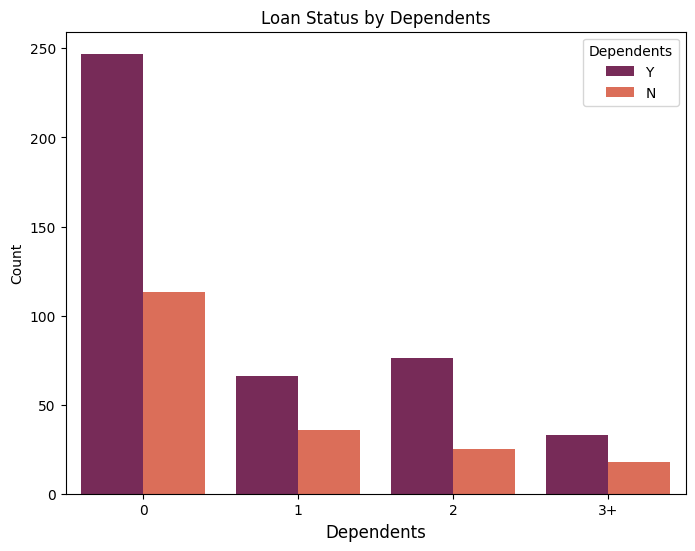

In [43]:
plt.figure(figsize=(8, 6))
snp.countplot(x=l_cat['Dependents'], hue=l_cat['Loan_Status'], data=l_cat,palette='rocket')
plt.title('Loan Status by Dependents')
plt.xlabel('Dependents',fontsize=12)
plt.ylabel('Count')
plt.legend(title='Dependents')
plt.show()

In [44]:
loan_status_by_property = l_cat.groupby('Property_Area')['Loan_Status'].value_counts()
loan_status_by_property

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: count, dtype: int64

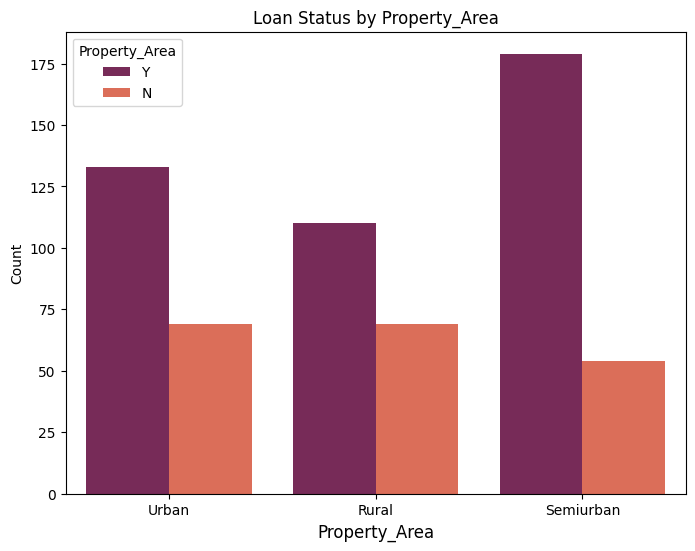

In [45]:
plt.figure(figsize=(8, 6))
snp.countplot(x=l_cat['Property_Area'], hue=l_cat['Loan_Status'], data=l_cat,palette='rocket')
plt.title('Loan Status by Property_Area')
plt.xlabel('Property_Area',fontsize=12)
plt.ylabel('Count')
plt.legend(title='Property_Area')
plt.show()

In [46]:
loan_status_by_self = l_cat.groupby('Self_Employed')['Loan_Status'].value_counts()
loan_status_by_self

Self_Employed  Loan_Status
No             Y              366
               N              166
Yes            Y               56
               N               26
Name: count, dtype: int64

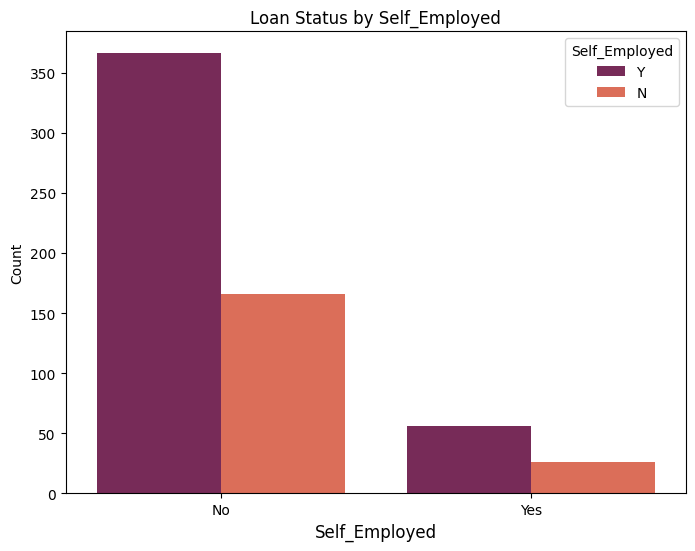

In [47]:
plt.figure(figsize=(8, 6))
snp.countplot(x=l_cat['Self_Employed'], hue=l_cat['Loan_Status'], data=l_cat,palette='rocket')
plt.title('Loan Status by Self_Employed')
plt.xlabel('Self_Employed',fontsize=12)
plt.ylabel('Count')
plt.legend(title='Self_Employed')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
df = df.drop(columns='Loan_ID')

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [52]:
le=LabelEncoder()

In [53]:
for col in cols:
    df[col]=le.fit_transform(df[col].astype(str))

In [54]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [55]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [56]:
x=df.drop(columns=['Loan_Status'])

In [57]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [58]:
y=df['Loan_Status']

In [59]:
from sklearn.model_selection import train_test_split 

In [60]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.25, random_state=0) 

In [61]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [62]:
from sklearn.linear_model import LogisticRegression 
classifer = LogisticRegression(random_state=0) 
classifer.fit(X_train,y_train) 

LogisticRegression(random_state=0)

In [63]:
classifer.score(X_train,y_train)

0.8021739130434783

In [64]:
y_pred= classifer.predict(X_test) 

In [65]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred) 
cm

array([[ 20,  23],
       [  2, 109]], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred) 

0.8376623376623377

In [67]:
pred_data = pd.DataFrame([['0','1','2','1','0','8000','5000','200','120','1','2']],columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area'])

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
pred_data = scaler.fit_transform(pred_data) 

In [70]:
classifer.predict(pred_data)

array([1])

In [71]:
import pickle as pk 

In [72]:
pk.dump(classifer,open('model.pkl','wb')) 

In [73]:
pk.dump(scaler,open("scaler.pkl",'wb')) 

In [77]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred) 
accuracy

0.8376623376623377

In [81]:
from sklearn.metrics import precision_score 
precision = precision_score(y_test, y_pred) 
precision

0.8257575757575758

In [85]:
from sklearn.metrics import recall_score 
recall = recall_score(y_test, y_pred) 
recall

0.9819819819819819

In [87]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test, y_pred) 
f1

0.897119341563786